In [1]:
# RECOMMENDATION SYSTEM 1 - Product pupularity based system targetted at new customers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

# %matplotlib inline
#plt.style.use("ggplot")

In [3]:
amazon = pd.read_csv(r"C:\REAL TIME PROJECTS\RECOMMENDATION SYSTEM\ratings_Beauty.csv")
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [4]:
amazon = amazon.dropna()
amazon.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [5]:
amazon.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [6]:
amazon.shape

(2023070, 4)

In [7]:
pop_prod = pd.DataFrame(amazon.groupby('ProductId')['Rating'].count()) 
# combined product id and rating to find the most popular product 
most_pop = pop_prod.sort_values('Rating', ascending=False)
most_pop.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

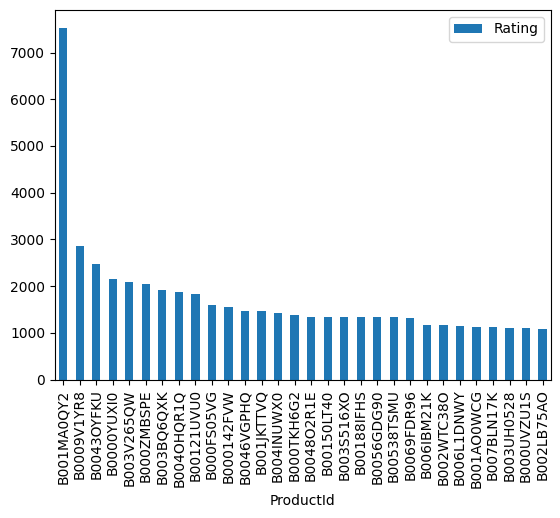

In [8]:
most_pop.head(30).plot(kind = "bar")

In [9]:
# RECOMMENDATION SYSTEM 2 - Model-based collaborative filtering system based on customer's purchase history
#                           and ratings provided by other users who bought items similar items

In [10]:
amazon1 = amazon.head(500)

In [11]:
rating = amazon1.pivot_table(values='Rating', index='ProductId', columns='UserId', fill_value=0)
rating.head()
# used to find the rating of every product given by every user

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A05492663T95KW63BR75K,A100GYE1W4OXZ8,A10205RFE66H1R,A10REFE1TW3ZVT,A10ZKDOZOSH219,A11AT6B3912DCU,A11J7PLZJ99M7O,A11OEJ4R1PDTLN,...,AY25UTTDNJ5SX,AY3F1CVHTNVBU,AYFZQPNEVSFMD,AYHZNXRPOHMO2,AYI1LDJYGG0ZK,AYM7E80UCJX7I,AZ4FR14IPKML7,AZGGH4GS18RUN,AZLE2XFH3JUNG,AZWRTJPN7NXT
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
rating.shape

(170, 453)

In [13]:
# Transposing the matrix

In [14]:
x = rating.T
x.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,9742126046,9742189889,9742496811,974383785X,9744287233,9744434139,9745340936,9745343412,974619187X,9746427962
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A05492663T95KW63BR75K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100GYE1W4OXZ8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10205RFE66H1R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


In [15]:
# Decomposing the Matrix

In [16]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x)
decomposed_matrix.shape

(453, 10)

In [17]:
# Correlation Matrix

In [18]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(453, 453)

In [19]:
i = x.index[27] # randomly selecting a product

In [20]:
correlation_product_ID = correlation_matrix[27]
correlation_product_ID.shape

(453,)

In [21]:
# Recommending top 10 highly correlated products in sequence

In [22]:
Recommend = list(x.index[correlation_product_ID > 0.90])
Recommend.remove(i) 
Recommend[0:9] # top 10 highly correlated products recommendation

['A1JM3NL9GSQ17N',
 'A267CAHUU3HOPQ',
 'A2686J58T322ZS',
 'A26TLFFBFPEOKJ',
 'A2H3NOCLLEPOKQ',
 'A2P0254ZZ42ZOJ',
 'A2Q8QWVIZM213M',
 'A39SBRLJ1EQX1R',
 'A3A2HRW0GR4EWU']

In [23]:
# RECOMMENDATION SYSTEM 3 -  When a business is setting up for the first time without any product rating

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import adjusted_rand_score

In [25]:
product = pd.read_csv(r"C:\REAL TIME PROJECTS\RECOMMENDATION SYSTEM\product_descriptions.csv")
product.shape

(124428, 2)

In [26]:
product.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [27]:
product_descriptions = product["product_description"]# taking product description to a different data set
pro_des = product_descriptions.head(1000)

vec = TfidfVectorizer(stop_words='english') 
x1 = vec.fit_transform(pro_des) # removing stop words in the product description
x1

<5000x38186 sparse matrix of type '<class 'numpy.float64'>'
	with 349999 stored elements in Compressed Sparse Row format>

In [28]:
# KMEANS CLUSTRING

C:\Users\aaabh\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


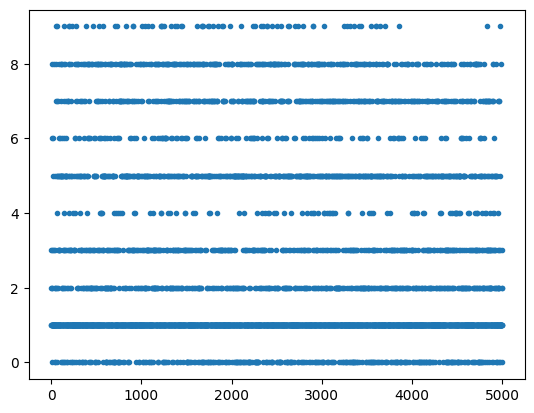

In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 10, init = 'k-means++')
xkm = km.fit_predict(x1)
mp.plot(xkm, ".")
mp.show()

In [30]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [31]:
# # Optimal clusters is 
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(x1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names_out()
for i in range(true_k):
    print_cluster(i) 

Top terms per cluster:
Cluster 0:
 spray
 hose
 pump
 nozzle
 water
 shower
 pressure
 watering
 showerhead
 flow
Cluster 1:
 door
 doors
 insulation
 garage
 glass
 steel
 security
 energy
 freezer
 panel
Cluster 2:
 light
 watt
 bulb
 fan
 led
 lighting
 bulbs
 energy
 fixture
 white
Cluster 3:
 ft
 use
 easy
 steel
 design
 used
 resistant
 installation
 home
 outdoor
Cluster 4:
 tile
 indoor
 ceramic
 wall
 residential
 recommended
 commercial
 thinset
 frost
 installation
Cluster 5:
 battery
 volt
 power
 speed
 lithium
 ion
 cooking
 tool
 oven
 cycle
Cluster 6:
 blade
 saw
 cutting
 tooth
 miter
 cut
 cuts
 blades
 carbide
 steel
Cluster 7:
 storage
 shelf
 cabinet
 shelves
 ladder
 vanity
 drawer
 adjustable
 easy
 finish
Cluster 8:
 water
 heater
 tank
 hot
 toilet
 faucet
 valve
 flush
 bowl
 handle
Cluster 9:
 paint
 wood
 proposition
 nbsp
 california
 residents
 65
 ft
 concrete
 painted


In [32]:
def show_recommendations(product):
    #print("Cluster ID:")
    y = vec.transform([product])
    prediction = model.predict(y)
    #print(prediction)
    print_cluster(prediction[0])

In [33]:
show_recommendations("cutting tool")

Cluster 6:
 blade
 saw
 cutting
 tooth
 miter
 cut
 cuts
 blades
 carbide
 steel
